<a href="https://colab.research.google.com/github/Vilars/Data-205/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [62]:
#import dataset
t_df = pd.read_csv('https://raw.githubusercontent.com/Vilars/Data-205/refs/heads/main/Troubled.csv', index_col=0)

In [19]:
t_df.head()

,Community Name,Street Address,City,Zip Code,Case Number,Longitude,Latitude,First Inspection Date,Next Inspection Date,Inspection Frequency,Compliant,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold,Analysis Rating,Location
License Number,,,,,,,,,,,,,,,,,,,,
62427,The Veridian At Silver Spring Metro,1133 East West Hwy,Silver Spring,20910,178097,-77.027783,38.989347,06/15/2023,NaN,3.0,1,457,110,0.54,0.72,68,0.00,0.0,compliant,"(38.9893, -77.0278)"
17369,"Schrider Street, 8115",8115 Schrider St,Silver Spring,20910,178075,-77.014091,38.991809,04/18/2023,NaN,2.0,1,9,11,3.72,1.67,2,0.27,0.0,troubled,"(38.9918, -77.0141)"
17200,Seneca Ridge,19568 Scenery Dr,Germantown,20876,177536,-77.234887,39.176872,04/13/2023,NaN,3.0,1,71,58,1.62,1.13,26,0.05,0.0,compliant,"(39.1769, -77.2349)"
17632,The Point At Germantown,2 Observation Ct,Germantown,20876,175575,-77.247494,39.192140,03/29/2023,NaN,2.0,1,218,63,0.85,1.11,28,0.03,0.0,compliant,"(39.1921, -77.2475)"
17286,"Kennebec Avenue, 903",903 KENNEBEC AVE,Takoma Park,20912,158817,-76.999427,38.990245,01/23/2020,NaN,2.0,0,1,0,0.00,0.00,0,0.00,0.0,TBD,"(38.9902, -76.9994)"


In [4]:
t_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 620 entries, 62427 to 27164
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Community Name               620 non-null    object 
 1    Street Address              620 non-null    object 
 2   City                         620 non-null    object 
 3   Zip Code                     620 non-null    object 
 4   Case Number                  620 non-null    int64  
 5   Longitude                    620 non-null    float64
 6   Latitude                     620 non-null    float64
 7   First Inspection Date        620 non-null    object 
 8   Next Inspection Date         0 non-null      float64
 9   Inspection Frequency         602 non-null    float64
 10  Compliant                    620 non-null    int64  
 11  Unit Count                   620 non-null    int64  
 12  Units Inspected              620 non-null    int64  
 13  Average Violations 

In [5]:
t_df.describe()

,Case Number,Longitude,Latitude,Next Inspection Date,Inspection Frequency,Compliant,Unit Count,Units Inspected,Average Violations Per Unit,Severity Index,No Violations Observed,Infested Units Percentage,Units with Mold
count,620.000000,620.000000,620.000000,0.0,602.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000,620.000000
mean,169510.162903,-71.711345,36.315073,NaN,2.468439,0.709677,103.377419,36.875806,1.226629,0.803484,15.629032,0.019452,0.008758
std,9268.917205,19.593214,9.921991,NaN,0.782398,0.454278,152.891251,85.504220,1.588173,3.976216,26.398422,0.059162,0.038831
min,106412.000000,-81.529192,0.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,-96.250000,0.000000,0.000000,0.000000
25%,161023.750000,-77.083482,38.990110,NaN,2.000000,0.000000,4.000000,4.000000,0.250000,0.267500,1.000000,0.000000,0.000000
50%,173290.500000,-77.013500,38.995081,NaN,3.000000,1.000000,19.500000,9.000000,0.850000,1.000000,4.000000,0.000000,0.000000
75%,176703.250000,-76.999471,39.030486,NaN,3.000000,1.000000,152.000000,44.000000,1.687500,1.500000,22.000000,0.000000,0.000000
max,178118.000000,0.000000,39.312144,NaN,3.000000,1.000000,1119.000000,1069.000000,17.000000,4.720000,280.000000,0.660000,0.460000


In [6]:
t_df.isnull().sum()

,0
Community Name,0
Street Address,0
City,0
Zip Code,0
Case Number,0
Longitude,0
Latitude,0
First Inspection Date,0
Next Inspection Date,620
Inspection Frequency,18


In [63]:
t_df['Severity Index'] = t_df['Severity Index'].replace(-96.25, np.nan)

In [64]:
# drop NA
t_df = t_df.dropna(subset=['Inspection Frequency'])

In [6]:
# fix city names
t_df['City'] = t_df['City'].str.title()


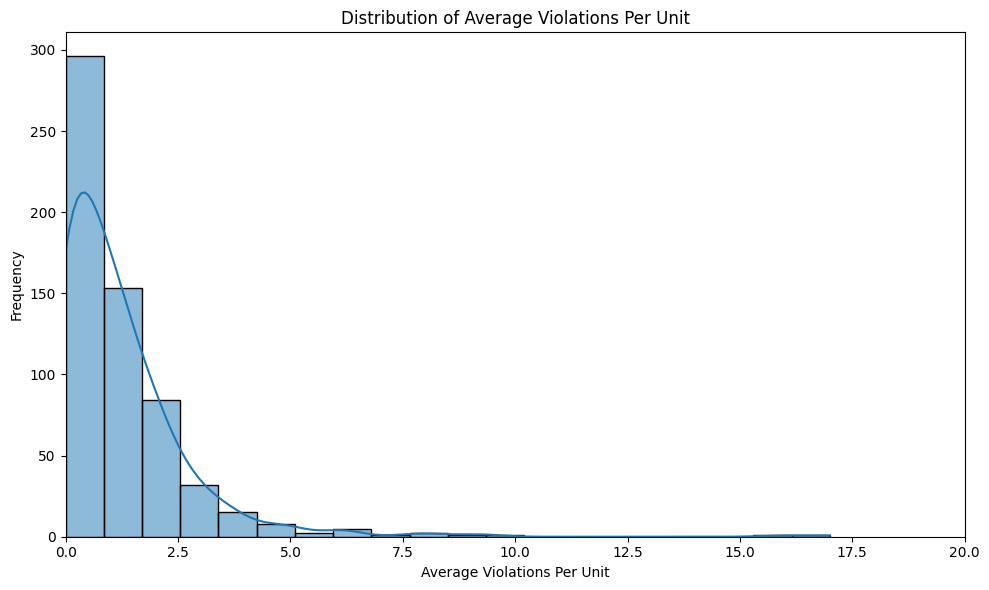

In [10]:
# distribution of average violation per unit
plt.figure(figsize=(10, 6))
sns.histplot(t_df['Average Violations Per Unit'], bins=20, kde=True)
plt.xlabel('Average Violations Per Unit')
plt.ylabel('Frequency')
plt.title('Distribution of Average Violations Per Unit')
plt.xlim(0, 20)
plt.tight_layout()
plt.show()

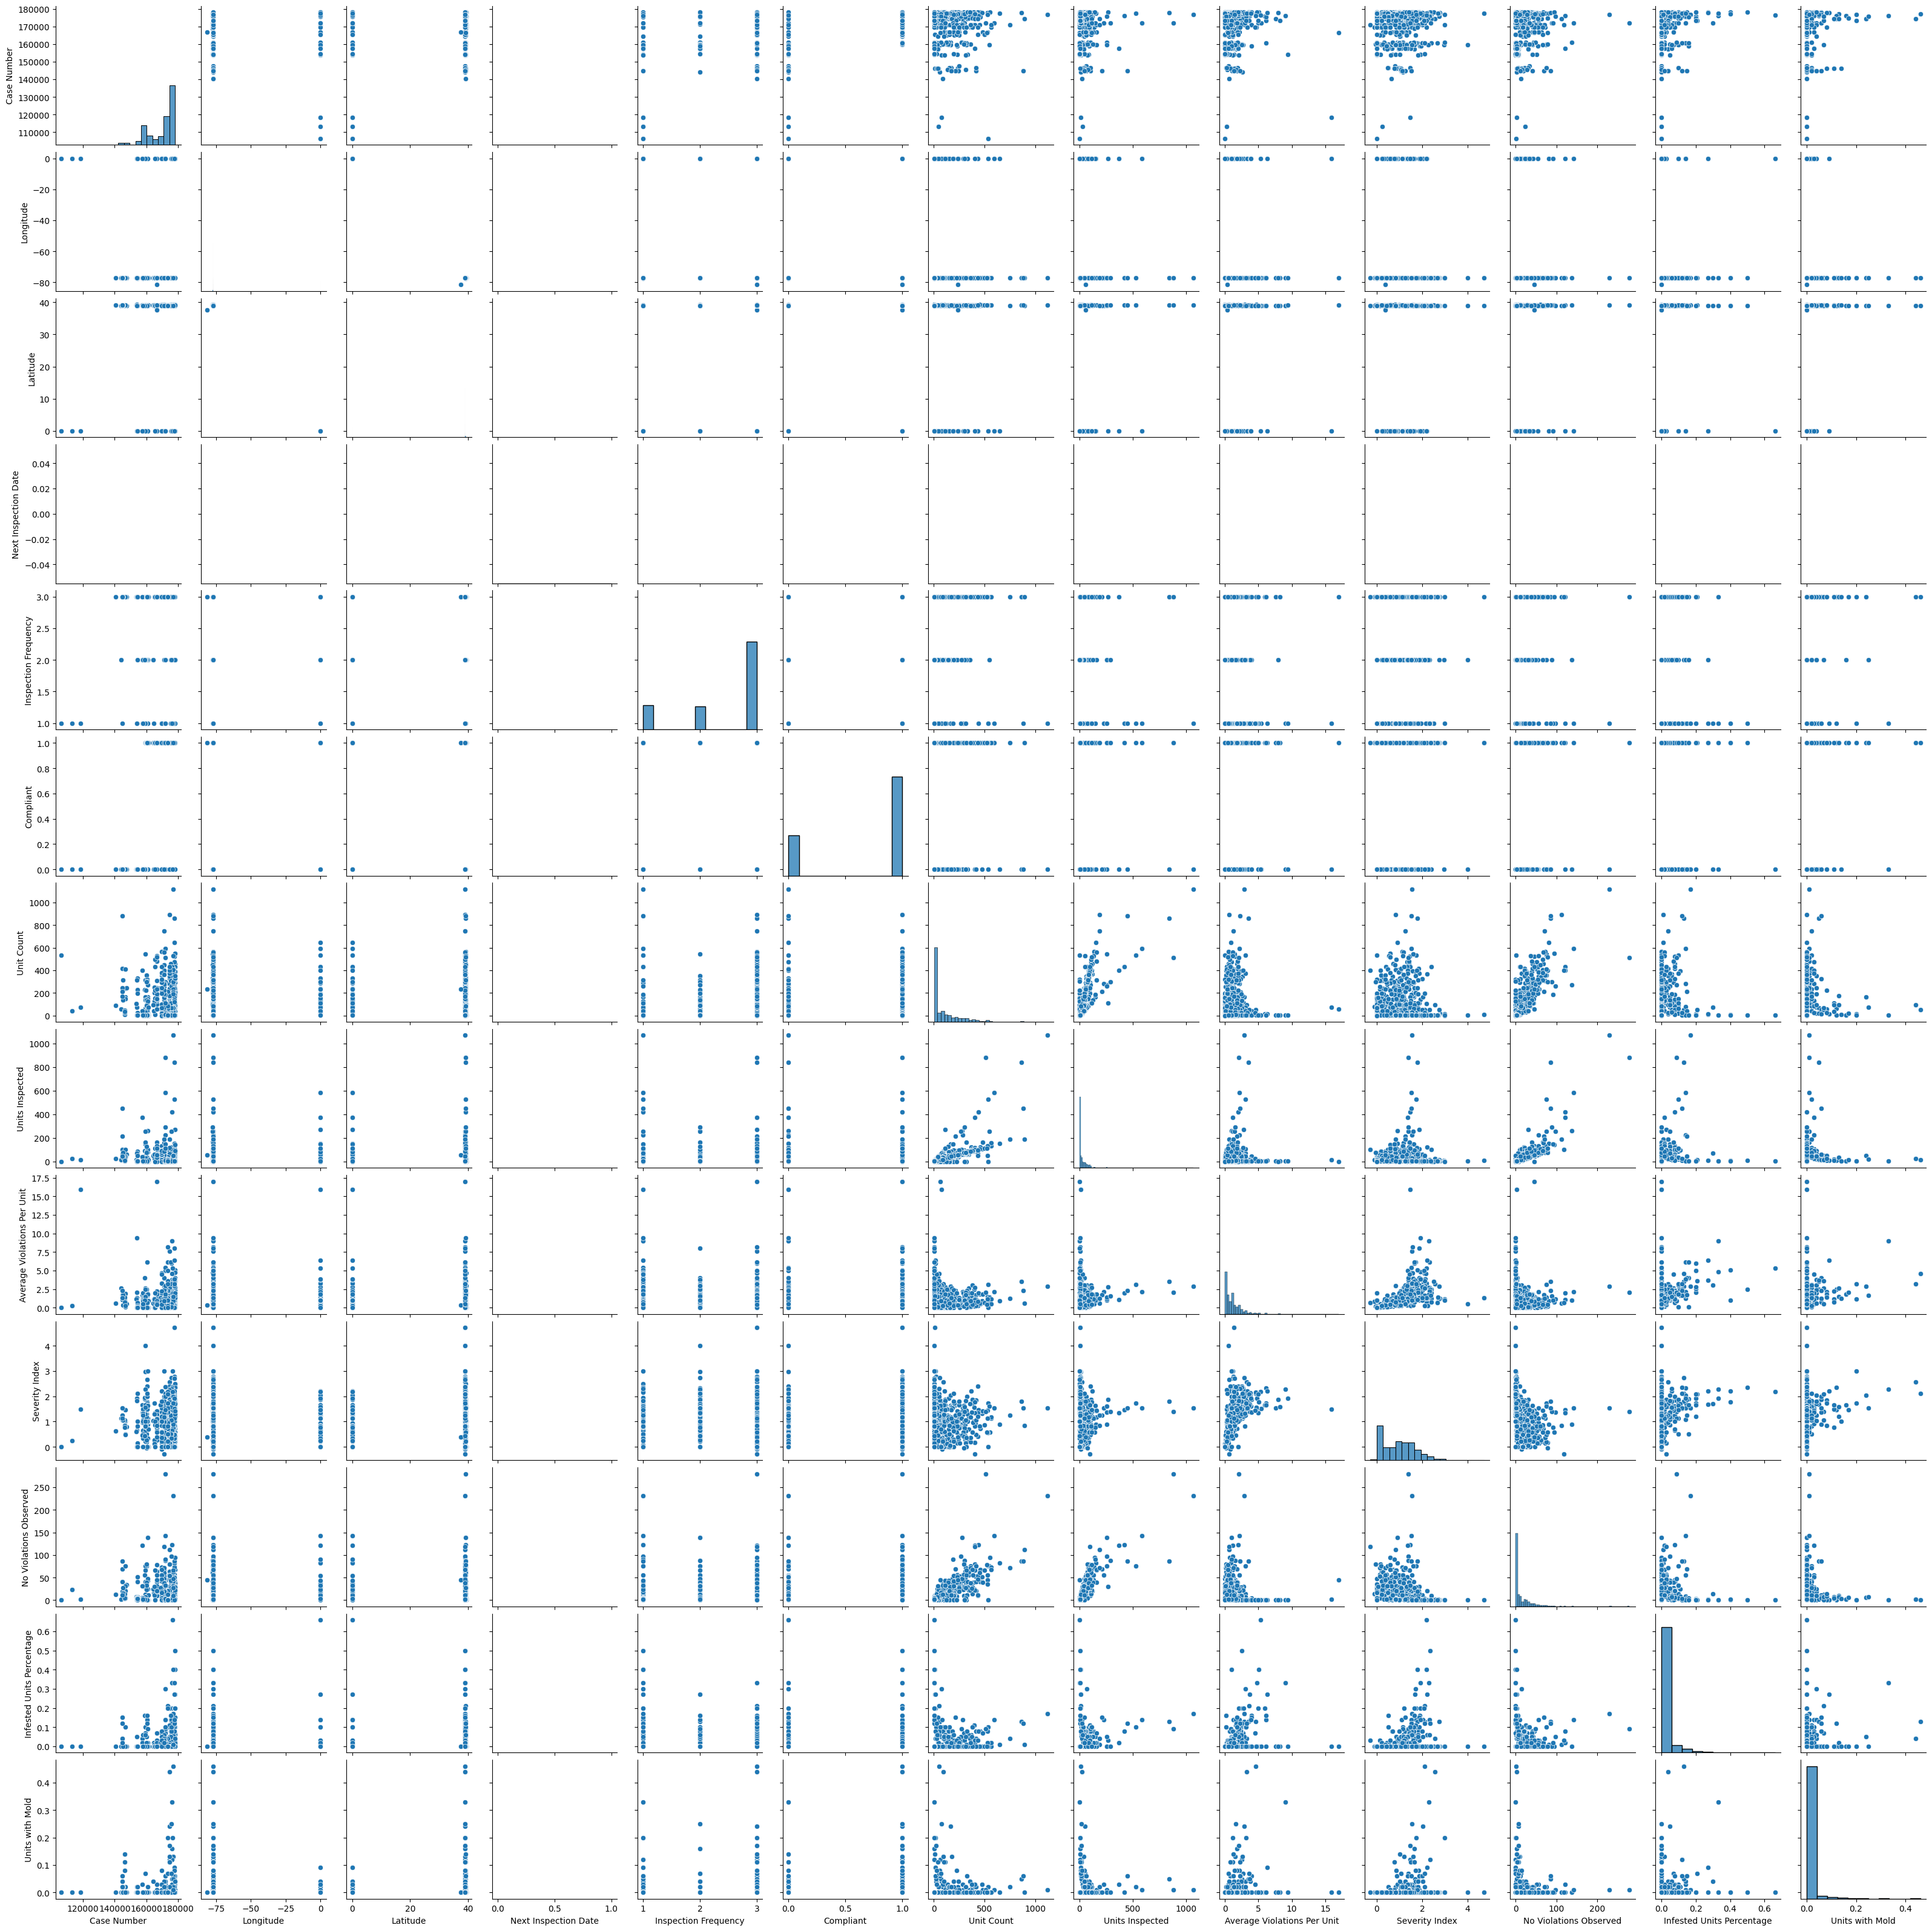

In [21]:
sns.pairplot(t_df)
plt.show()

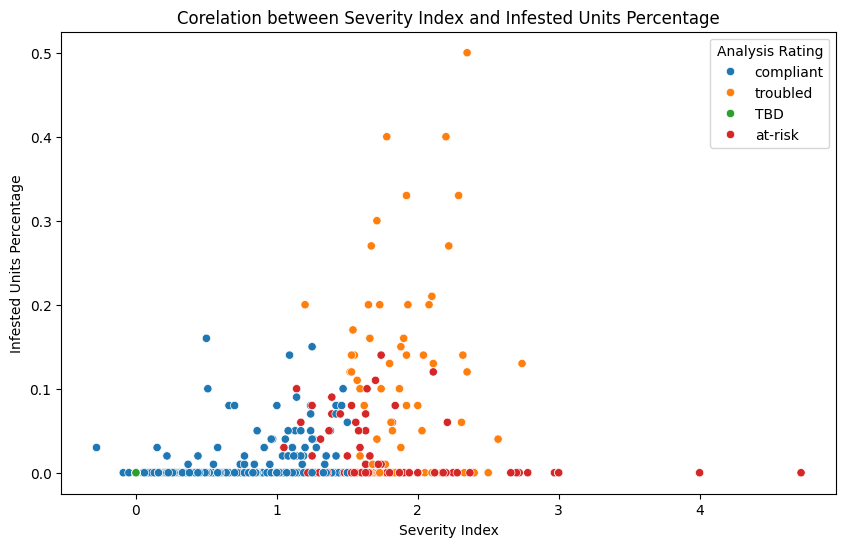

In [19]:
# Corelation between severity index and infested unit

plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Severity Index', y = 'Infested Units Percentage', data = t_df, hue = 'Analysis Rating')
plt.xlabel('Severity Index')
plt.ylabel('Infested Units Percentage')
plt.title('Corelation between Severity Index and Infested Units Percentage')

plt.show()

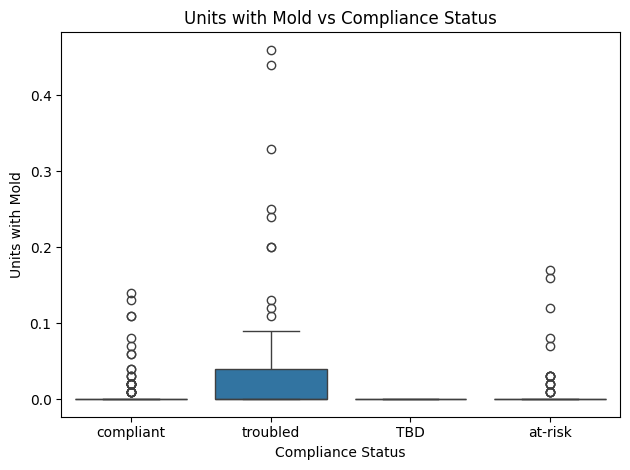

In [17]:
# units with mold vs compliance status
sns.boxplot(x = 'Analysis Rating', y = 'Units with Mold', data = t_df)
plt.title('Units with Mold vs Compliance Status')
plt.xlabel('Compliance Status')
plt.ylabel('Units with Mold')
plt.tight_layout()
plt.show()

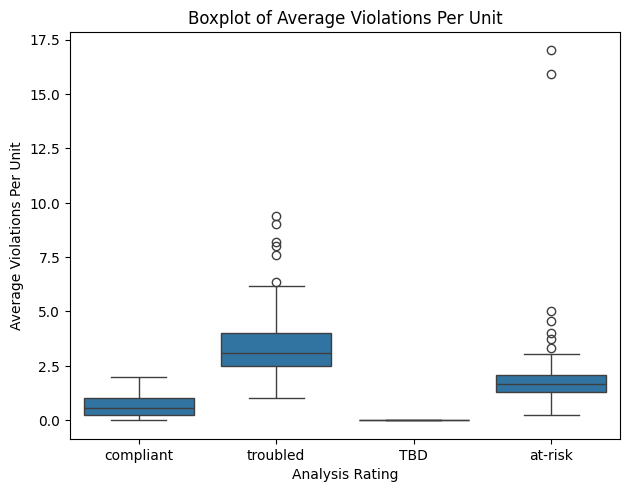

In [18]:
# filter based on status
compliant_df =  t_df[t_df['Analysis Rating'] == 'compliant']
troubled_df = t_df[t_df['Analysis Rating'] == 'troubled']

# plot
sns.boxplot(x = 'Analysis Rating', y = 'Average Violations Per Unit', data = t_df)
plt.tight_layout()
plt.title('Boxplot of Average Violations Per Unit')
plt.xlabel('Analysis Rating')
plt.ylabel('Average Violations Per Unit')
plt.show()



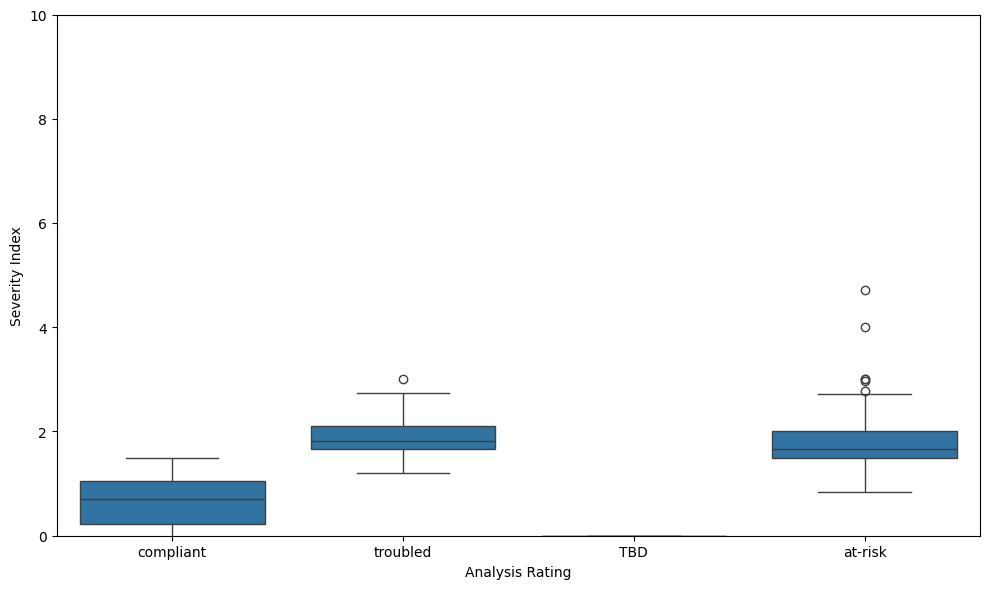

In [19]:
# Severity index
plt.figure(figsize=(10, 6))
compliant_severity = compliant_df['Severity Index']
troubled_severity = troubled_df['Severity Index']

# plot
sns.boxplot(x = 'Analysis Rating', y = 'Severity Index', data = t_df)
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

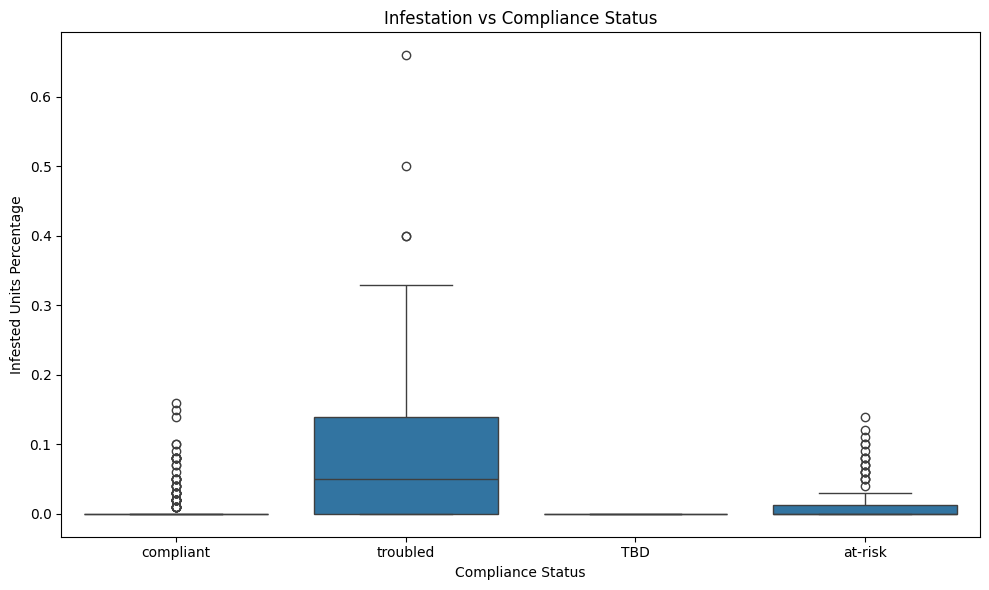

In [20]:
# Infestation
plt.figure(figsize=(10, 6))
compliant_infestation = compliant_df['Infested Units Percentage']
troubled_infestation = troubled_df['Infested Units Percentage']

sns.boxplot(x = 'Analysis Rating', y = 'Infested Units Percentage', data = t_df)
plt.title('Infestation vs Compliance Status')
plt.xlabel('Compliance Status')
plt.ylabel('Infested Units Percentage')
plt.tight_layout()
plt.show()

Pearson's correlation: 0.12713149919242853


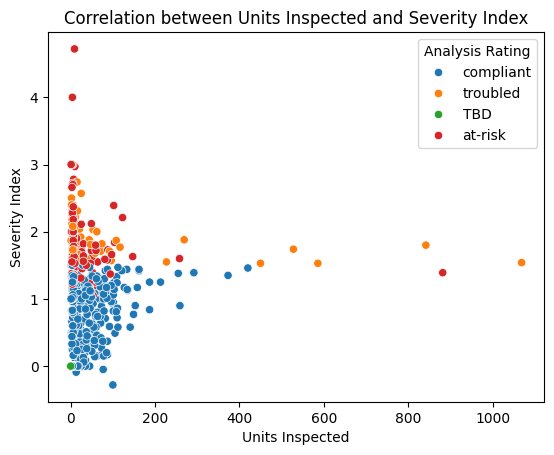

In [26]:
# Calculate correlation
correlation = t_df['Units Inspected'].corr(t_df['Severity Index'])
print(f"Pearson's correlation: {correlation}")

# Create scatterplot
sns.scatterplot(x='Units Inspected', y='Severity Index', data=t_df, hue='Analysis Rating')
plt.title('Correlation between Units Inspected and Severity Index')
plt.show()

Pearson's correlation: 0.22266735976716454


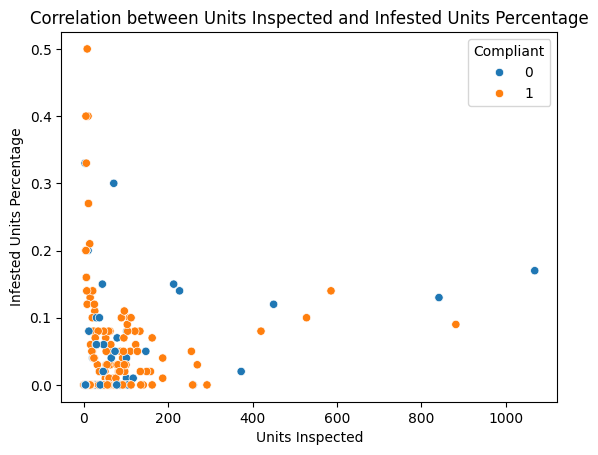

In [22]:
# Calculate correlation
correlation = t_df['Units Inspected'].corr(t_df['Infested Units Percentage'])
print(f"Pearson's correlation: {correlation}")

# Create scatterplot
sns.scatterplot(x='Units Inspected', y='Infested Units Percentage', data=t_df, hue='Compliant')
plt.title('Correlation between Units Inspected and Infested Units Percentage')
plt.show()

In [7]:
# Filter the dataframe based on Analysis Rating
compliant_df = t_df[t_df['Analysis Rating'] == 'compliant']
troubled_df = t_df[t_df['Analysis Rating'] == 'troubled']
tbd_df = t_df[t_df['Analysis Rating'] == 'at-risk']

# Calculate key metrics for each rating
metrics = ['Average Violations Per Unit', 'Severity Index', 'Infested Units Percentage', 'Units with Mold']

compliant_metrics = compliant_df[metrics].mean()
troubled_metrics = troubled_df[metrics].mean()
tbd_metrics = tbd_df[metrics].mean()

# Print the comparison of key metrics
print("Comparison of key metrics between properties rated compliant, troubled, and at-risk:")
print("\nCompliant Properties:")
print(compliant_metrics)
print("\nTroubled Properties:")
print(troubled_metrics)
print("\nTBD Properties:")
print(tbd_metrics)

# Identify factors that correlate with a property being labeled troubled
correlation_factors = t_df[metrics].corr()

print("\nCorrelation factors for properties labeled troubled:")
print(correlation_factors)


Comparison of key metrics between properties rated compliant, troubled, and at-risk:

Compliant Properties:
Average Violations Per Unit    0.673600
Severity Index                 0.665173
Infested Units Percentage      0.006747
Units with Mold                0.003147
dtype: float64

Troubled Properties:
Average Violations Per Unit    3.580625
Severity Index                 1.888500
Infested Units Percentage      0.089000
Units with Mold                0.041875
dtype: float64

TBD Properties:
Average Violations Per Unit    2.044000
Severity Index                 1.820101
Infested Units Percentage      0.016900
Units with Mold                0.008800
dtype: float64

Correlation factors for properties labeled troubled:
                             Average Violations Per Unit  Severity Index  \
Average Violations Per Unit                     1.000000        0.591092   
Severity Index                                  0.591092        1.000000   
Infested Units Percentage                     

In [24]:
# Select relevant numeric columns to compare
columns_to_compare = [
    'Average Violations Per Unit',
    'Severity Index',
    'Infested Units Percentage',
    'Units with Mold',
    'Units Inspected'
]

# Group by 'Analysis Rating' and calculate the mean for these columns
grouped_averages = t_df.groupby('Analysis Rating')[columns_to_compare].mean()
grouped_averages

,Average Violations Per Unit,Severity Index,Infested Units Percentage,Units with Mold,Units Inspected
Analysis Rating,,,,,
TBD,0.000000,0.000000,0.000000,0.000000,0.000000
at-risk,2.044000,1.820101,0.016900,0.008800,35.970000
compliant,0.673600,0.665173,0.006747,0.003147,35.434667
troubled,3.580625,1.888500,0.089000,0.041875,66.987500


<ipython-input-10-c6f919515f9a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Analysis Rating'] = filtered_data['Analysis Rating'].apply(lambda x: 1 if x == 'compliant' else 0)


                 Average Violations Per Unit  Severity Index
Analysis Rating                                             
0                                   2.162335        1.465796
1                                   0.673600        0.665173


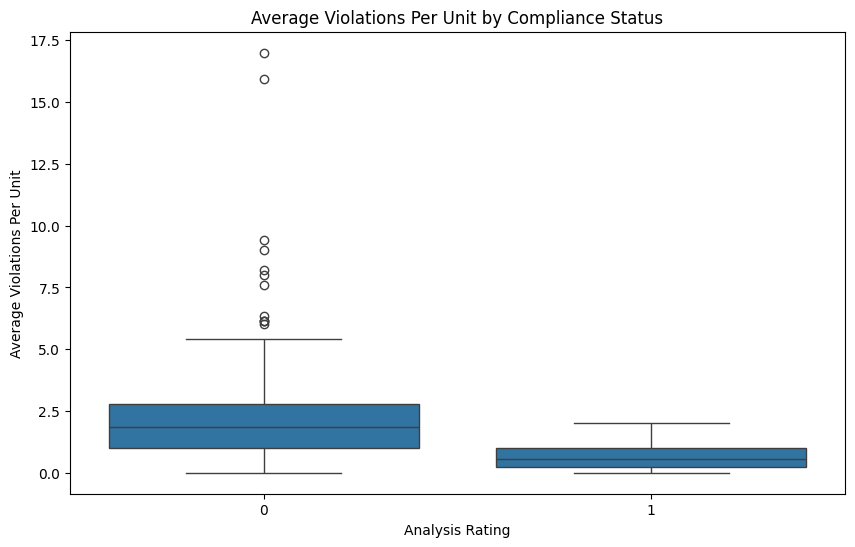

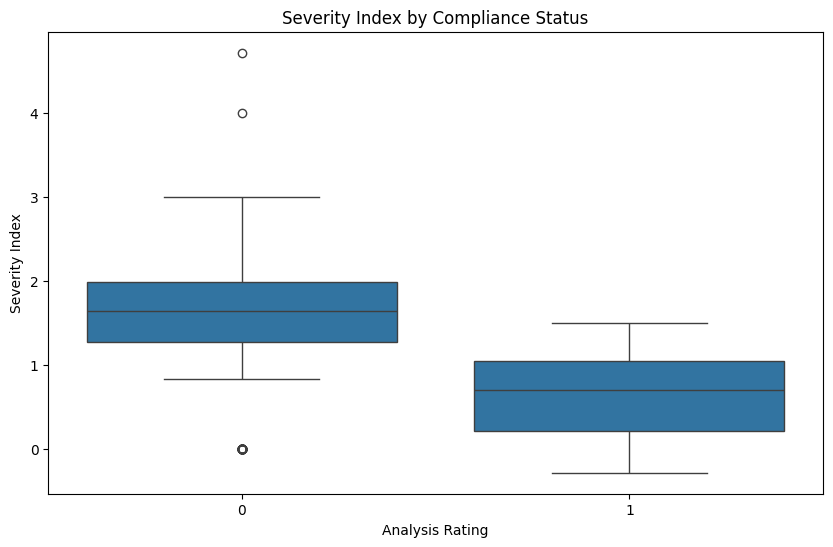

Correlation between Analysis Rating and Average Violations Per Unit:
                             Analysis Rating  Average Violations Per Unit
Analysis Rating                     1.000000                    -0.451944
Average Violations Per Unit        -0.451944                     1.000000
Correlation between Analysis Rating and Severity Index:
                 Analysis Rating  Severity Index
Analysis Rating         1.000000       -0.511567
Severity Index         -0.511567        1.000000


In [10]:

# Filter the data to include only relevant columns
filtered_data = t_df[['Analysis Rating', 'Average Violations Per Unit', 'Severity Index']]

# Assuming 'compliant' maps to 1 and other values to 0
filtered_data['Analysis Rating'] = filtered_data['Analysis Rating'].apply(lambda x: 1 if x == 'compliant' else 0)

# Group the data by Compliance Status and calculate the mean values for Average Violations Per Unit and Severity Index
grouped_data = filtered_data.groupby('Analysis Rating').mean()

# Display the grouped data
print(grouped_data)

# Visualize the correlation between Compliance Status and Average Violations Per Unit
plt.figure(figsize=(10, 6))
sns.boxplot(x='Analysis Rating', y='Average Violations Per Unit', data=filtered_data)
plt.title('Average Violations Per Unit by Compliance Status')
plt.show()

# Visualize the correlation between Compliance Status and Severity Index
plt.figure(figsize=(10, 6))
sns.boxplot(x='Analysis Rating', y='Severity Index', data=filtered_data)
plt.title('Severity Index by Compliance Status')
plt.show()

# Calculate correlation coefficients
correlation_violations = filtered_data[['Analysis Rating', 'Average Violations Per Unit']].corr(method='pearson')
correlation_severity = filtered_data[['Analysis Rating', 'Severity Index']].corr(method='pearson')

print("Correlation between Analysis Rating and Average Violations Per Unit:")
print(correlation_violations)

print("Correlation between Analysis Rating and Severity Index:")
print(correlation_severity)


                 Inspection Frequency  Average Violations Per Unit  \
Analysis Rating                                                      
TBD                          2.446809                     0.000000   
at-risk                      2.500000                     2.044000   
compliant                    2.536000                     0.673600   
troubled                     2.125000                     3.580625   

                 Severity Index  
Analysis Rating                  
TBD                    0.000000  
at-risk                1.820101  
compliant              0.665173  
troubled               1.888500  


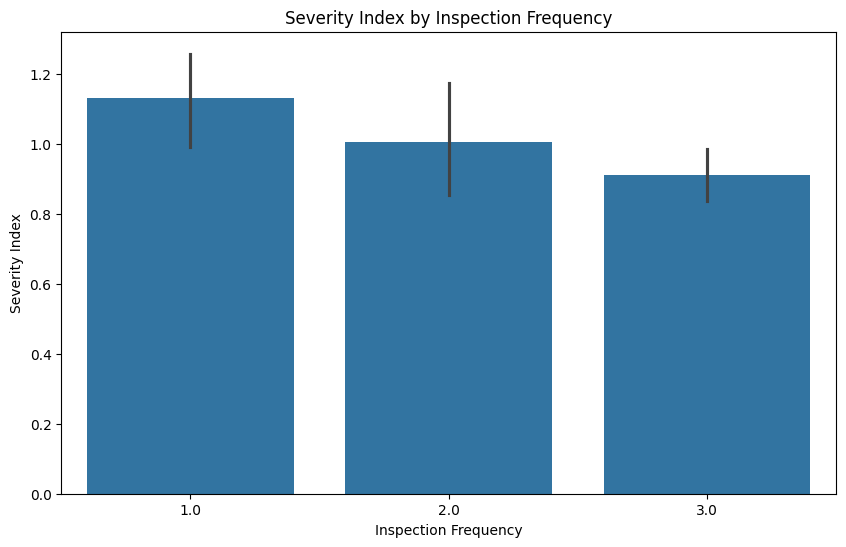

Correlation between Inspection Frequency and Average Violations Per Unit:
                             Inspection Frequency  Average Violations Per Unit
Inspection Frequency                     1.000000                    -0.168157
Average Violations Per Unit             -0.168157                     1.000000
Correlation between Inspection Frequency and Severity Index:
                      Inspection Frequency  Severity Index
Inspection Frequency              1.000000       -0.112404
Severity Index                   -0.112404        1.000000


In [47]:
# Filter the data to include only relevant columns
ins_df = t_df[['Analysis Rating', 'Inspection Frequency', 'Average Violations Per Unit', 'Severity Index']]

# Group the data by Analysis Rating and calculate the mean values for Inspection Frequency, Average Violations Per Unit, and Severity Index
grouped_data = ins_df.groupby('Analysis Rating').mean()

# Display the grouped data
print(grouped_data)

# Visualize the correlation between Inspection Frequency and Severity Index
plt.figure(figsize=(10, 6))
sns.barplot(x='Inspection Frequency', y='Severity Index', data=ins_df)
plt.title('Severity Index by Inspection Frequency')
plt.show()

# Calculate correlation coefficients
correlation_violations = ins_df[['Inspection Frequency', 'Average Violations Per Unit']].corr(method='pearson')
correlation_severity = ins_df[['Inspection Frequency', 'Severity Index']].corr(method='pearson')

print("Correlation between Inspection Frequency and Average Violations Per Unit:")
print(correlation_violations)

print("Correlation between Inspection Frequency and Severity Index:")
print(correlation_severity)


<ipython-input-28-226b949de54b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comp_df['Size Category'] = pd.cut(comp_df['Unit Count'], bins=size_bins, labels=size_labels)


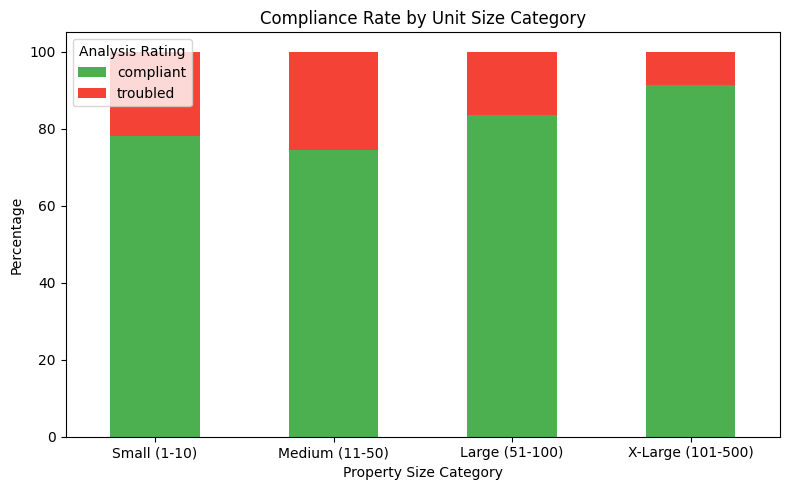

In [28]:
# Create size bins for Unit Count
size_bins = [0, 10, 50, 100, 500]
size_labels = ['Small (1-10)', 'Medium (11-50)', 'Large (51-100)', 'X-Large (101-500)']
comp_df = t_df[t_df['Analysis Rating'].isin(['compliant', 'troubled'])]
comp_df['Size Category'] = pd.cut(comp_df['Unit Count'], bins=size_bins, labels=size_labels)


# Calculate compliance rates by size category
compliance_by_size = pd.crosstab(comp_df['Size Category'], comp_df['Analysis Rating'], normalize='index') * 100

# Plot it
compliance_by_size.plot(kind='bar', stacked=True, color=['#4CAF50','#F44336'], figsize=(8,5))
plt.title('Compliance Rate by Unit Size Category')
plt.ylabel('Percentage')
plt.xlabel('Property Size Category')
plt.legend(title='Analysis Rating')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


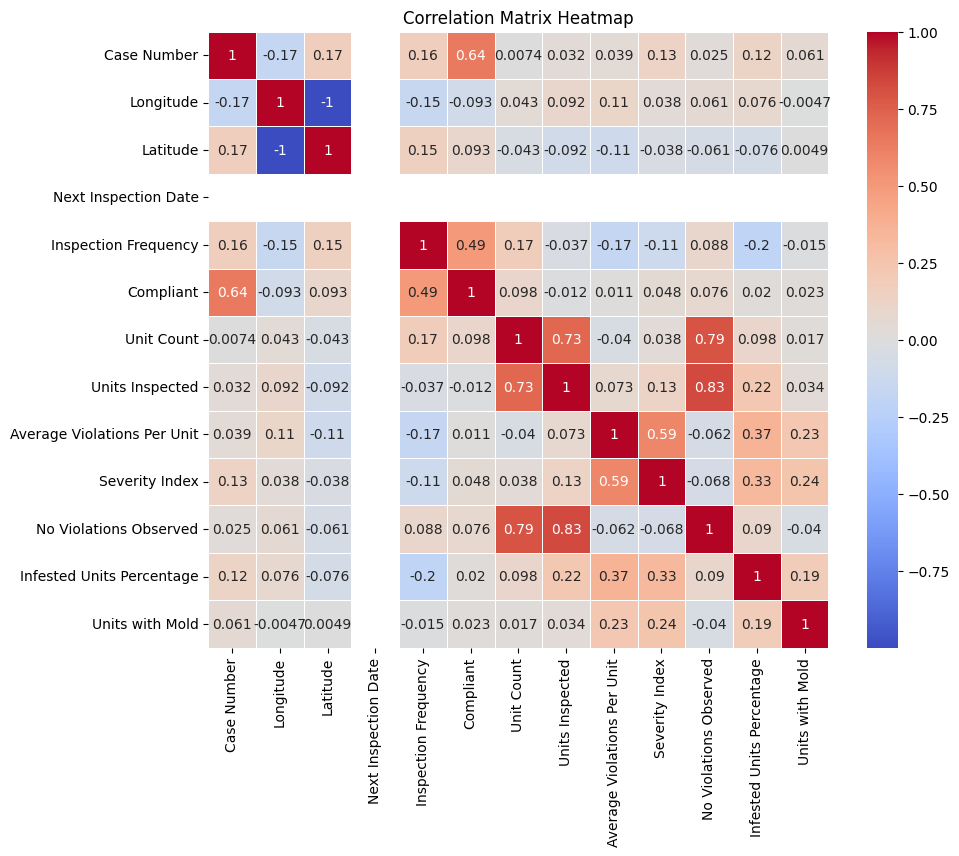

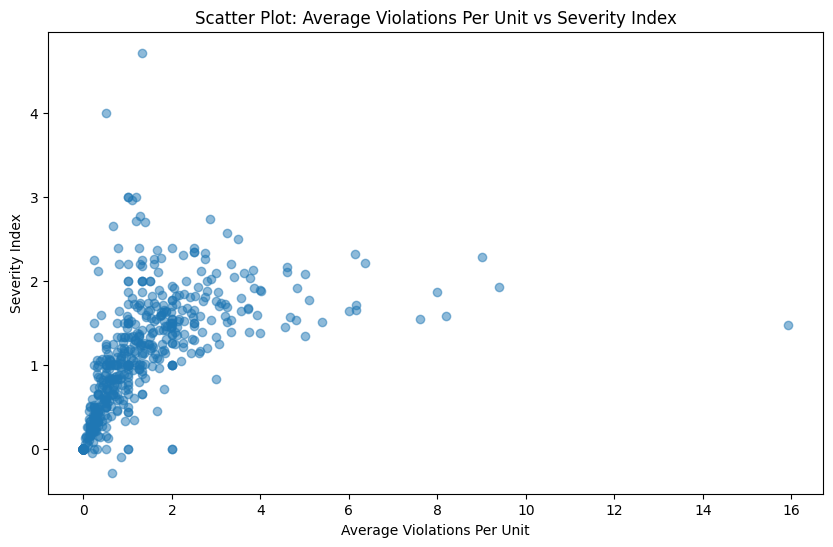

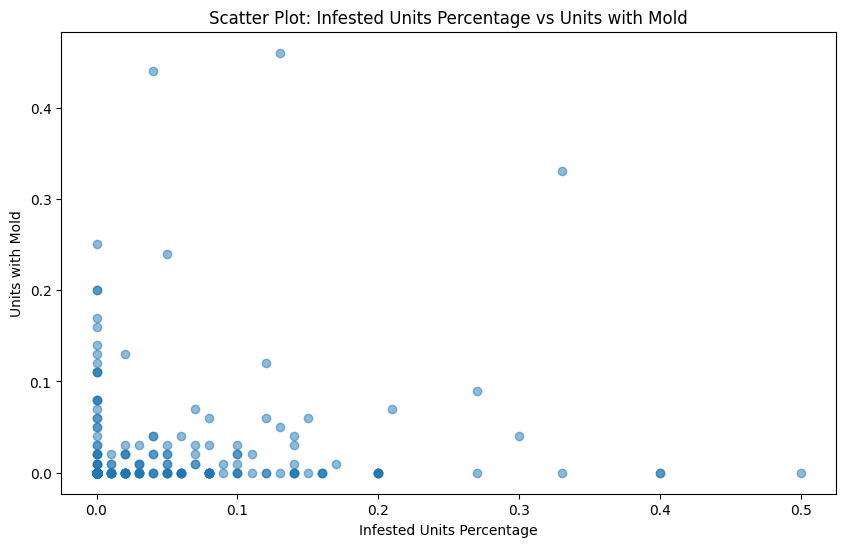

In [58]:
# Select numerical columns
numerical_data = t_df.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = numerical_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Scatter Plots: Relationships between Numerical Variables
plt.figure(figsize=(10, 6))
plt.scatter(t_df['Average Violations Per Unit'], t_df['Severity Index'], alpha=0.5)
plt.title('Scatter Plot: Average Violations Per Unit vs Severity Index')
plt.xlabel('Average Violations Per Unit')
plt.ylabel('Severity Index')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(t_df['Infested Units Percentage'], t_df['Units with Mold'], alpha=0.5)
plt.title('Scatter Plot: Infested Units Percentage vs Units with Mold')
plt.xlabel('Infested Units Percentage')
plt.ylabel('Units with Mold')
plt.show()


In [66]:
# Filter data for compliant and troubled properties
compliant_df = t_df[t_df['Analysis Rating'] == 'compliant']
troubled_df = t_df[t_df['Analysis Rating'] == 'troubled']

# Compare key metrics between compliant and troubled properties
metrics = ['Average Violations Per Unit', 'Severity Index', 'Infested Units Percentage', 'Units with Mold']
comparison_stats = pd.DataFrame({
    'Metric': metrics,
    'Compliant Mean': [compliant_df[metric].mean() for metric in metrics],
    'Troubled Mean': [troubled_df[metric].mean() for metric in metrics],
    'Compliant Median': [compliant_df[metric].median() for metric in metrics],
    'Troubled Median': [troubled_df[metric].median() for metric in metrics],
    'Compliant Std Dev': [compliant_df[metric].std() for metric in metrics],
    'Troubled Std Dev': [troubled_df[metric].std() for metric in metrics]
})

print("Comparison of Key Metrics between Compliant and Troubled Properties:")
print(comparison_stats)

# Analyze how unit size affects compliance and other metrics
unit_size_compliance = t_df.groupby('Unit Count')['Compliant'].mean()
unit_size_violations = t_df.groupby('Unit Count')['Average Violations Per Unit'].mean()
unit_size_severity = t_df.groupby('Unit Count')['Severity Index'].mean()


Comparison of Key Metrics between Compliant and Troubled Properties:
                        Metric  Compliant Mean  Troubled Mean  \
0  Average Violations Per Unit        0.673600       3.580625   
1               Severity Index        0.665173       1.888500   
2    Infested Units Percentage        0.006747       0.089000   
3              Units with Mold        0.003147       0.041875   

   Compliant Median  Troubled Median  Compliant Std Dev  Troubled Std Dev  
0              0.55            3.055           0.564528          1.709068  
1              0.70            1.820           0.481790          0.321398  
2              0.00            0.045           0.021435          0.112886  
3              0.00            0.000           0.015119          0.091694  


In [67]:
from scipy import stats


# Filter data for compliant and troubled properties
compliant_df = t_df[t_df['Analysis Rating'] == 'compliant']
troubled_df = t_df[t_df['Analysis Rating'] == 'troubled']

# Perform t-tests to compare means between compliant and troubled properties for various metrics
metrics = ['Average Violations Per Unit', 'Severity Index', 'Infested Units Percentage', 'Units with Mold']
t_test_results = {}

for metric in metrics:
    t_stat, p_value = stats.ttest_ind(compliant_df[metric], troubled_df[metric], equal_var=False)
    t_test_results[metric] = {'t-statistic': t_stat, 'p-value': p_value}

print("T-test Results:")
for metric, results in t_test_results.items():
    print(f"{metric}: t-statistic = {results['t-statistic']}, p-value = {results['p-value']}")


T-test Results:
Average Violations Per Unit: t-statistic = -15.03965585798366, p-value = 2.1961437967262936e-25
Severity Index: t-statistic = -27.990038673298642, p-value = 1.5625501519905575e-64
Infested Units Percentage: t-statistic = -6.49223028207245, p-value = 6.525813630394748e-09
Units with Mold: t-statistic = -3.766830152759365, p-value = 0.00031470611680994566
